--2021-09-30 13:43:02--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Training loss: 486.35976009070873
Training loss: 371.8786369860172
Training loss: 334.11281990259886
Training loss: 313.64451576024294
Training loss: 296.1241363286972


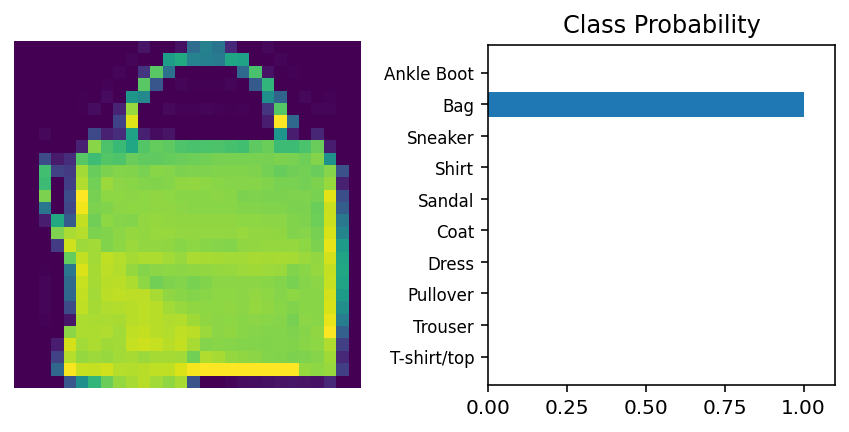

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

!pip install helper
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py


import helper
from torch import nn, optim
#pra usar função de ativação, log softmax, relu
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
import torch

#inferencia e validação

transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5), (0.5)),
                               ])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

#Definindo a arquitetura da rede 
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    #quatro transformações lineares diferentes 
    #3 camadas ocultas e uma camada de saída
    #primeira camada oculta tem 256 unidades 
    self.fc1 = nn.Linear(784,256)
    #segunda camada oculta tem 128 unidades 
    self.fc2 = nn.Linear(256,128)
    #terceira camada oculta tem 64 unidades 
    self.fc3 = nn.Linear(128, 64)
    #nossa camada de saída tem 10 unidades 
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    #certificar que o tensor de entrada está achatado
    x = x.view(x.shape[0], -1)

    #ai não precisa achatar no loop de treinamento
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim = 1)

    return x


model = Classifier()
criterion = nn.NLLLoss()
#Adam optmizer, basicamente o mesmo que a descida gradiente estocástica, mas tem umas propriedades onde usa o momento que acelera o processo de ajuste real 
#ele também ajusta a taxa de aprendizado para cada um dos parametros individuais em seu modelo 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.003)

epocas = 5
for e in range(epocas):
  running_loss = 0
  for images, labels in trainloader:
    logps = model(images)
    loss = criterion(logps, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss}")

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))

helper.view_classify(img, ps, version='Fashion')